Student Name: Zeel Samir Shah (8917091)

                                            Practical Lab-3

# *<span style="color:pink">Frame the problem and look at the big picture.</span>*

Problem Framing:

Using the diabetes dataset, determining how BMI (Body Mass Index) is associated to disease progression.

Big Picture:

The analysis uses univariate linear regression to study obesity's impact on diabetes progression, aiming to improve healthcare by understanding the complex relationship between genetics and lifestyle.

# *<span style="color:pink">Get the Data</span>*

In [3]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,accuracy_score

from sklearn import datasets

In [6]:
# Load the diabetes dataset from scikit-learn
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print("Diabetes Feature Data X:\n", diabetes_X)
print("Diabetes Target Data Y:\n", diabetes_y)

Diabetes Feature Data X:
 [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
Diabetes Target Data Y:
 [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111. 


# *<span style="color:pink">Explore the data to gain insights.</span>*
Each patient in the dataset is described by their age, sex, body mass index, average blood pressure, and six blood serum measures. The dataset also includes a quantitative assessment of disease progression one year from baseline for the 442 diabetic patients.

In [10]:
# Now we will convert raw data into pandas dataframe:
diabetes_data=pd.DataFrame(diabetes_x,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
diabetes_data['disease_progression']=pd.DataFrame(diabetes_y)
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Looking for correlation between features using Heatmap.

<Axes: >

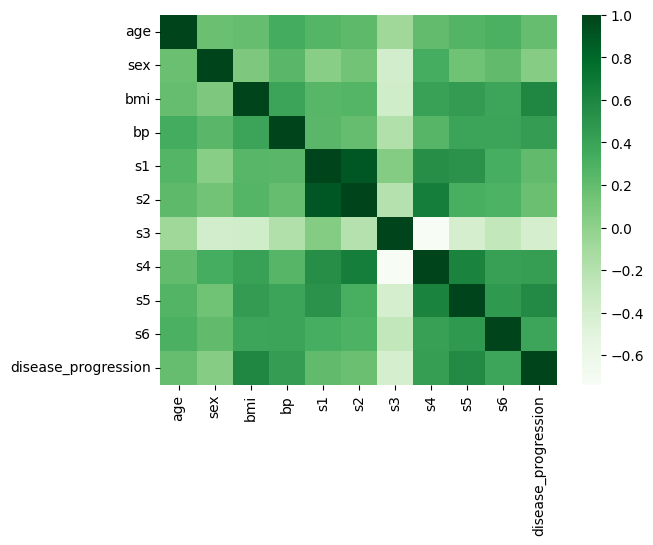

In [48]:
sns.heatmap(diabetes_data.corr(),cmap='Greens')

# *<span style="color:pink">Fine-tune your models and combine them into a great solution.</span>*
Splitting the data into training and testing datasets.

In [50]:
X = np.array(diabetes_data["bmi"]).reshape(-1, 1)
y = np.array(diabetes_data["disease_progression"])

test_size = 0.2
random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

Training Linear Regression Model.

In [51]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Prediction of target value using test sets.

In [52]:
Y_test_pred=model.predict(X_test)
Y_train_pred=model.predict(X_train)

Evaluating the trained model's coefficient and intercept. 

In [53]:
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficients:  [977.74040067]
Intercept:  151.66780594915235


Evaluating Mean squared error.

In [57]:
train_loss = mean_squared_error(Y_train, Y_train_pred)
test_loss = mean_squared_error(Y_test, Y_test_pred)

loss_results = { "Train Loss": train_loss, 
    "Test Loss": test_loss }

for label, loss in loss_results.items():
    print(f"{label}: {loss:.2f}")

Train Loss: 3867.94
Test Loss: 3989.83


# *<span style="color:pink">Present your solution</span>*

Lets plot the Model.

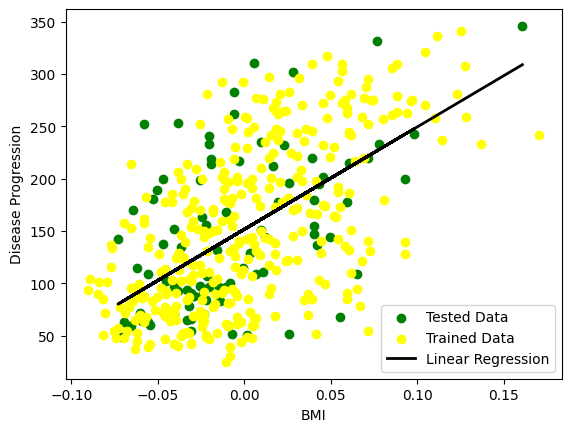

In [69]:
fig, ax = plt.subplots()

ax.scatter(X_test, Y_test, color='green', label='Tested Data')
ax.scatter(X_train, Y_train, color='yellow', label='Trained Data')
ax.plot(X_test, Y_test_pred, color='black', linewidth=2, label='Linear Regression')

ax.set_xlabel('BMI')
ax.set_ylabel('Disease Progression')

ax.legend()
plt.show()


<span style="color:pink">*Takeaways from the Model:*</span>

It is clear that there is some correlation between BMI and Disease Progression, our model's performance is uneven due to the data's spread, as measured by the mean squared error of the trained data (3867.94) and tested data (3989.83). The model's fit is good, but MSE values suggest room for improvement in predicting disease progression based on BMI. Further exploration, additional variables, and advanced regression techniques are recommended.